# Notebook for re-plotting the trajectories and such from csv's containing data from results generation
## Note, the notebook is nice for visualization, but slow. Use the .py file for speed and realiability...

In [82]:
import pandas as pd
import numpy as np
import pyvista as pv
pv.global_theme.jupyter_backend = 'static'

import sys
import os
# Add the parent directory to the system path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.insert(0, parent_dir)

from pv_plotting_3d import Plotter3D, Plotter3DMultiTraj
from gym_quad.envs.LV_VAE_MESH import LV_VAE_MESH

### Import the testresults data from wanted scene

In [83]:
exp_dir = f'Best_agent_res_gen_2 exp 32'
trained_scen = "advanced"
test_scen = "cave"
model_name = "test_agent_model_10000"
retrieve_data_path = os.path.join(parent_dir, 'log', 'LV_VAE_MESH-v0', exp_dir , trained_scen, 'results_gen', test_scen, model_name)
output_path = os.path.join(parent_dir, 'plotting', 'replotting_results', exp_dir , trained_scen, 'results_gen', test_scen, model_name)
# "C:\Users\admin\Desktop\EirikJorgenMasterCode\gym_quad\log\LV_VAE_MESH-v0\Best_agent_res_gen_2 exp 32\advanced\results_gen\horizontal\test_agent_model_10000\sim_df.csv"
# 'c:\\Users\\admin\\Desktop\\EirikJorgenMasterCode\\gym_quad\\log\\LV_VAE_MESH-v0\\Best_agent_res_gen_2 exp 32\\advanced\\results_gen\\horizontal\\test_agent_model 10000/sim_df.csv'
# Load the data
sim_data = pd.read_csv(retrieve_data_path + '/sim_df.csv')
metrics_data = pd.read_csv(retrieve_data_path + '/test_summary.csv')

In [84]:
# sim_data.head()

In [85]:
# metrics_data.head()

### Create env to create scenes:

In [86]:
from drl_config import lv_vae_config
replot_config = lv_vae_config.copy()
replot_config["mesh_path"] = os.path.join(parent_dir, 'gym_quad', 'meshes', 'sphere.obj')
replot_config["max_t_steps"] = 0
env = LV_VAE_MESH(env_config=replot_config,scenario=test_scen)
obstacles = env.unwrapped.obstacles
path = env.unwrapped.path

CAVE


c:\Users\admin\.conda\envs\c121_quad3D\lib\site-packages\pytorch3d\io\obj_io.py:546: UserWarning: No mtl file provided
  warnings.warn("No mtl file provided")


### For plotting single trajectories:

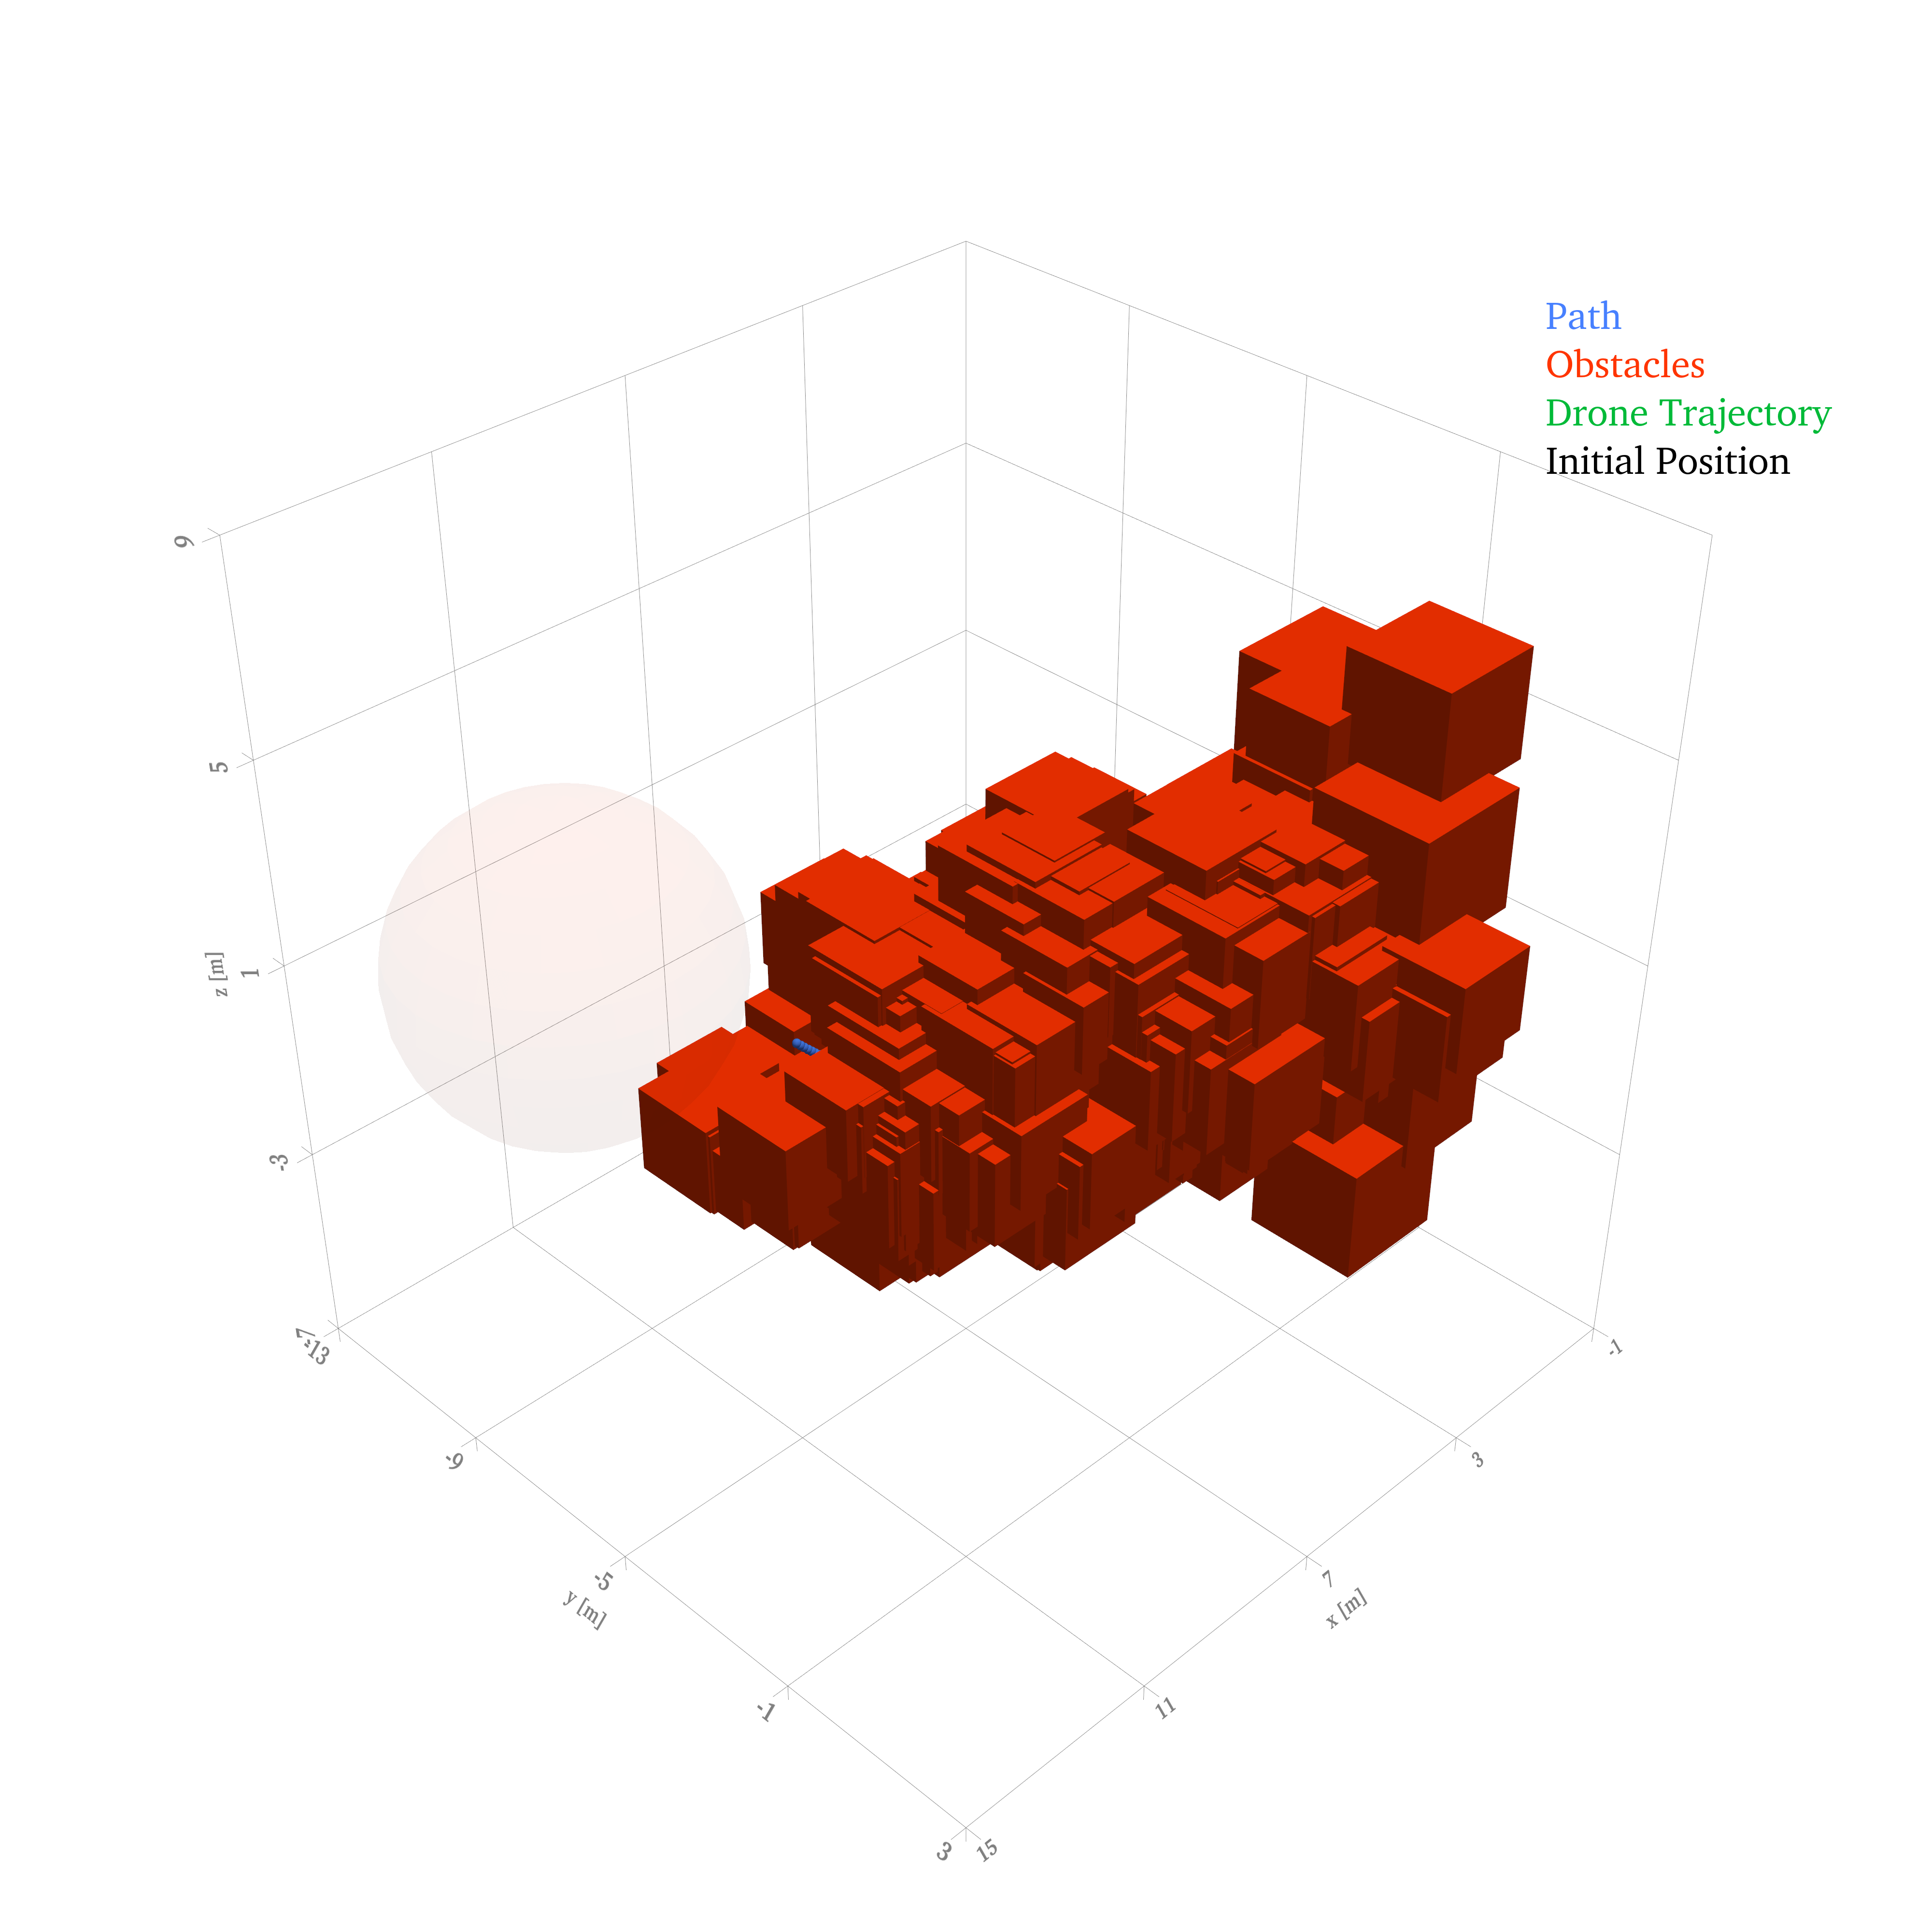

In [87]:
#decide which episode to plot
episode = 0
episode_df = sim_data[sim_data["Episode"]==episode]
drone_traj = np.stack((episode_df[r"$X$"], episode_df[r"$Y$"], episode_df[r"$Z$"]), axis=-1)
init_pos = drone_traj[0]

#Make sure the output path exists
os.makedirs(os.path.join(output_path, "plots"), exist_ok=True)

plotter = Plotter3D(obstacles=obstacles, 
                            path=path, 
                            drone_traj=drone_traj,
                            initial_position=init_pos,
                            save=True,
                            scene=test_scen) 
plotter.plot_scene_and_trajs(save_path=os.path.join(output_path, "plots", f"episode{episode}.png"), hv=1, only_scene=False)
del plotter

### For plotting multiple trajectories


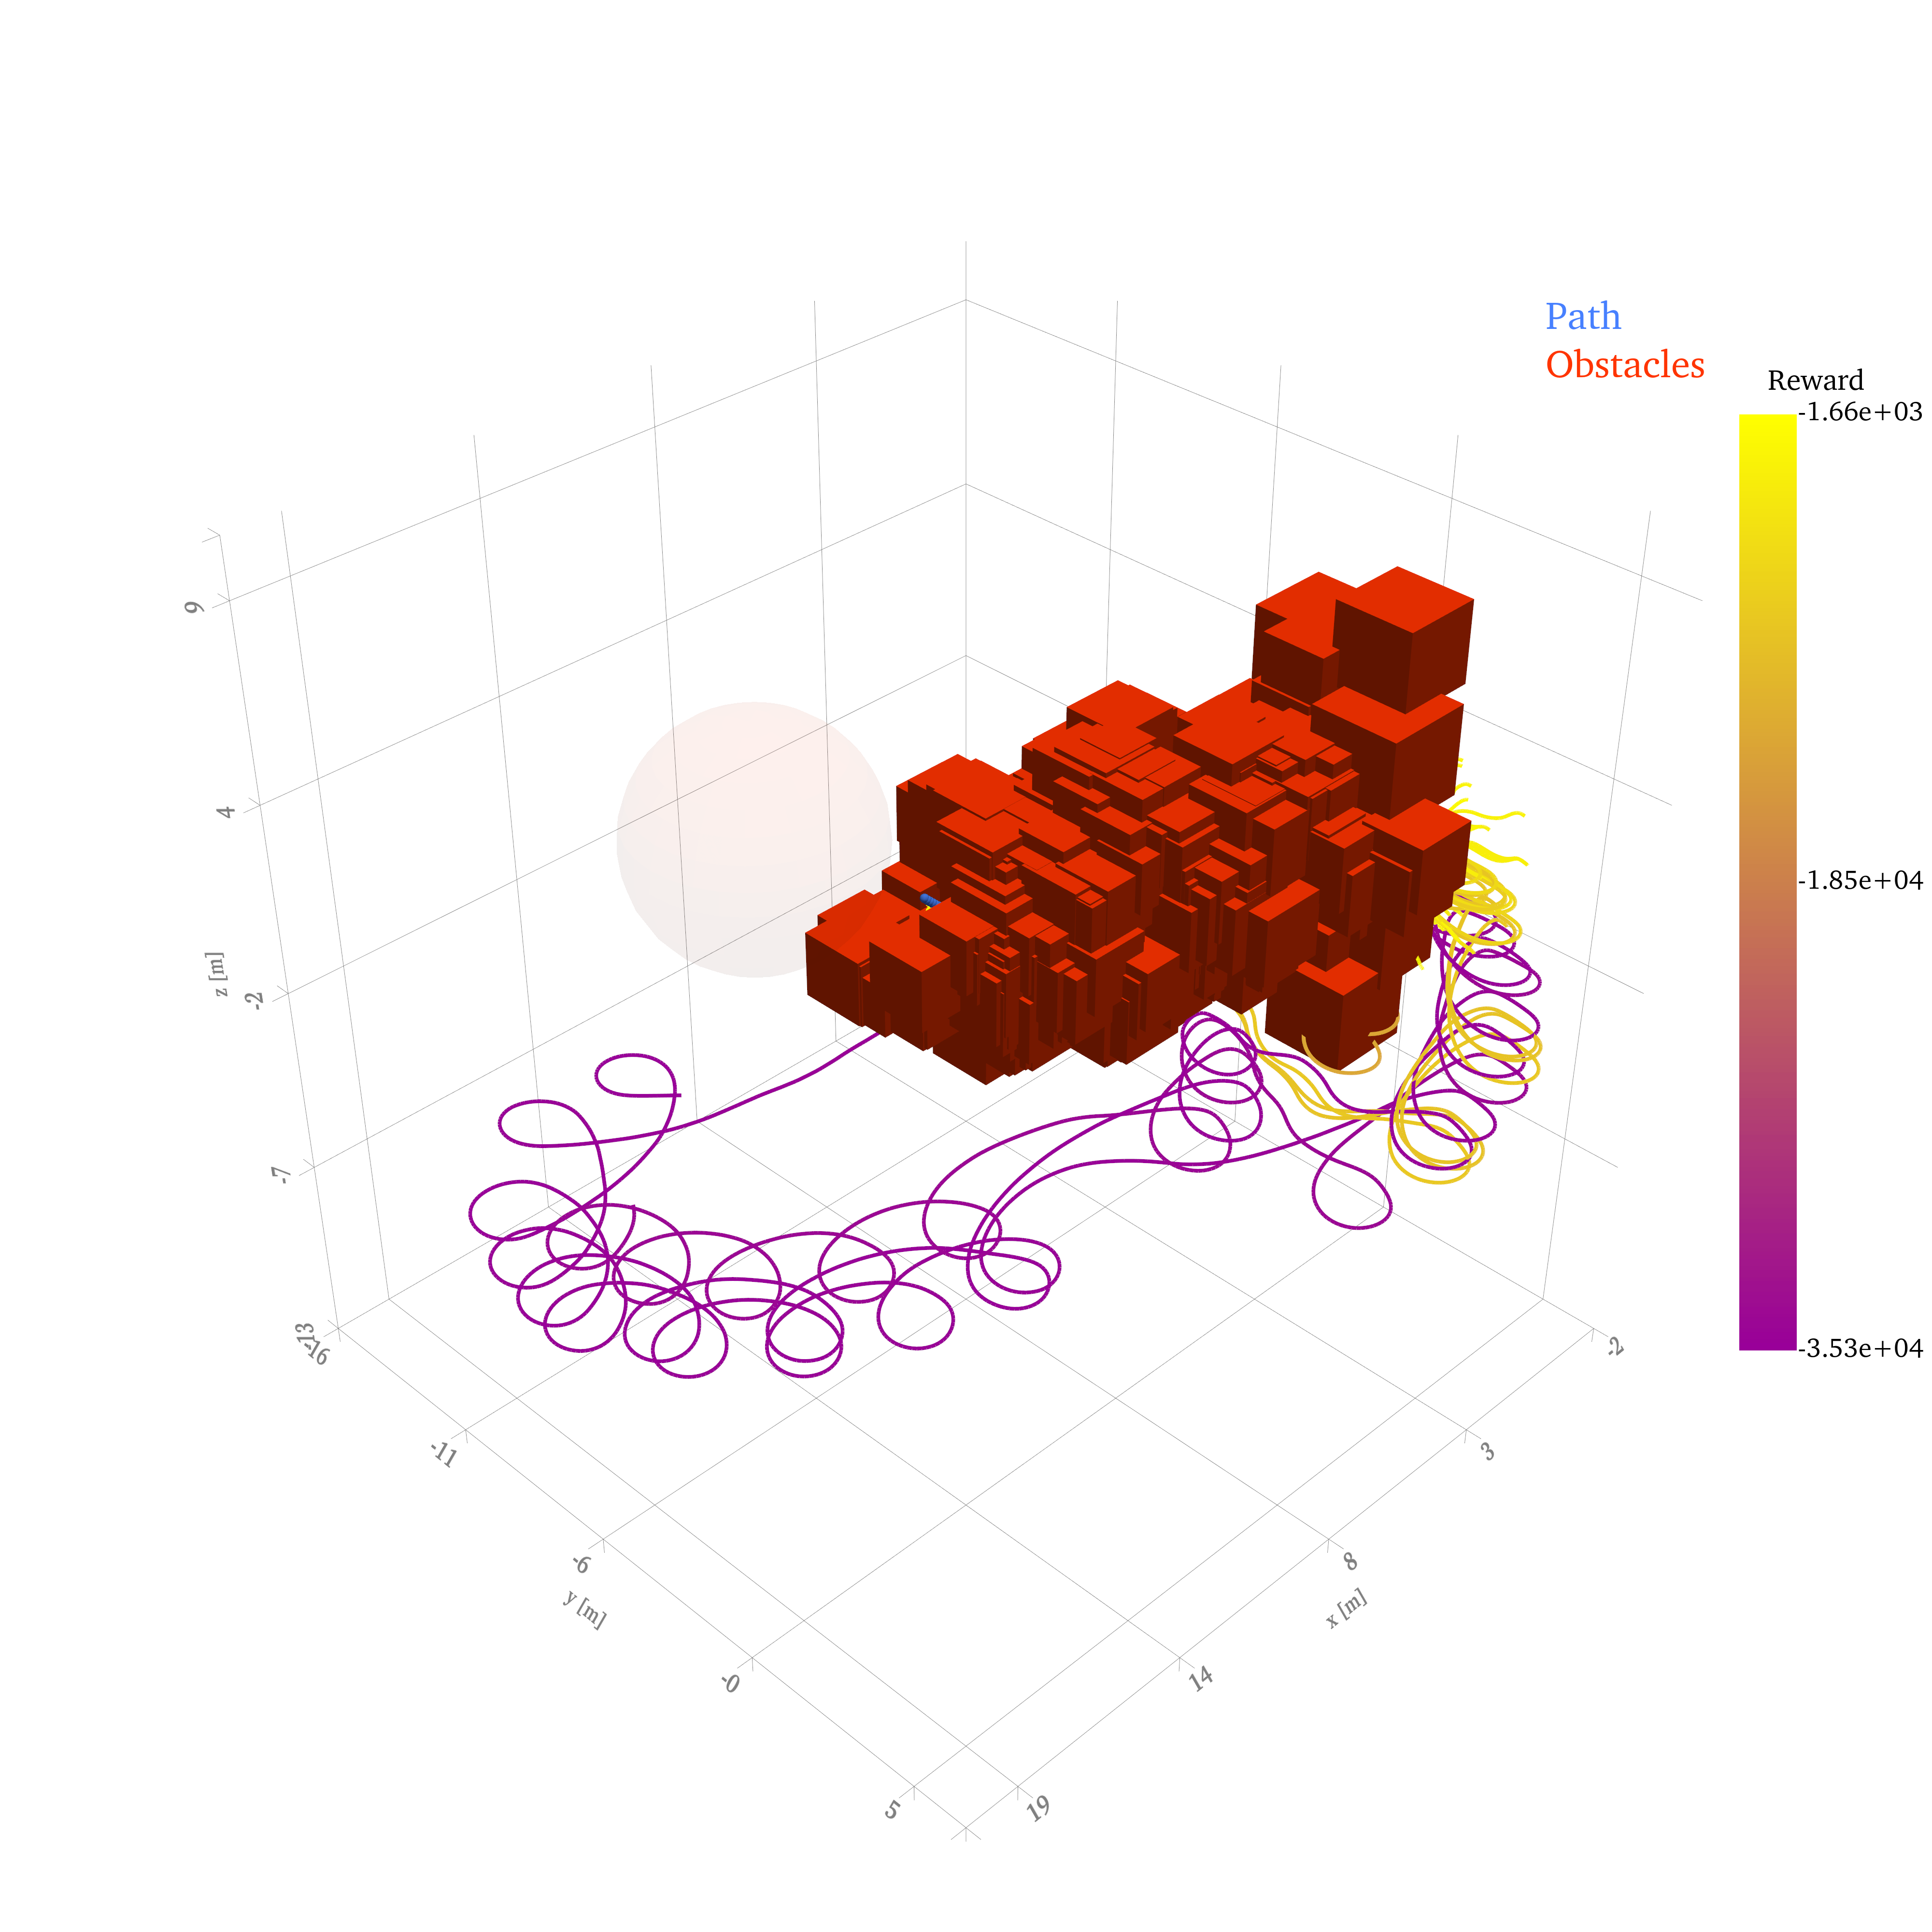

In [88]:
#Make sure the output path exists
os.makedirs(os.path.join(output_path, "plots"), exist_ok=True)
cum_rewards = {}
all_drone_trajs = {}
all_init_pos = {}

for episode in sim_data["Episode"].unique():
    episode_df = sim_data[sim_data["Episode"]==episode]
    drone_traj = np.stack((episode_df[r"$X$"], episode_df[r"$Y$"], episode_df[r"$Z$"]), axis=-1)
    init_pos = drone_traj[0]
    all_drone_trajs[episode] = drone_traj
    all_init_pos[episode] = all_drone_trajs[episode][0]
    cum_rewards[episode] = episode_df["Reward"].sum()

if test_scen in ["house_hard", "house_hard_obstacles"]:
    for hv in [1,2]: # View from two angles, must have separate instances. Solved with hv variable in plotter func. "hv=HouseView"
        multiplotter = Plotter3DMultiTraj(obstacles=obstacles,
                                            path=path,
                                            drone_trajs=all_drone_trajs,
                                            initial_position=init_pos,
                                            cum_rewards=cum_rewards,
                                            scene=test_scen,
                                            save=True)
        multiplotter.plot_scene_and_trajs(save_path=os.path.join(output_path, "plots", f"multiplot_hv{hv}.png"),
                                        azimuth=90,
                                        hv=hv)
        del multiplotter
else:
    multiplotter = Plotter3DMultiTraj(obstacles=obstacles,
                                    path=path,
                                    drone_trajs=all_drone_trajs,
                                    initial_position=init_pos,
                                    cum_rewards=cum_rewards,
                                    scene=test_scen,
                                    save=True)
    multiplotter.plot_scene_and_trajs(save_path=os.path.join(output_path, "plots", f"multiplot.png"),
                                    azimuth=90)